In [755]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_hastie_10_2

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


#IMPORTANT README ON THIS CLASSIFICATION EXERCISE
=================================================================


## Time expectations
- Data cleaning 2 hours 
- Data preprocessing (features, scaling) 1 hours
- Models investigation 3 hours - this task can be splited
- Models implementation - 2 hours
- Slides/dashboard/notebook - 2 hours
- Finalization and "beautification" (github, etc)  - 2 hours
Average time per person 4-6 hours

1. Please make sure the Y is not too granular: make sure to bin it to simplify the work of models

2. After using the model, play around with hyperparams

3. Finally, compare model performance by accuracy, ROC-AUC... 60+ % would be a good start

4. Use Trello instead of JIRA for project mgmt: make sure to provide hours worked on each task

In [756]:
df = pd.read_csv(r'C:/Users/olivi/Documents/Ironhack/DAFT_212/module_3/Project_week_7/imdb_processed.csv')
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl', 'Bob Gaynor', ""Nancy O'Meara""]",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko Ayase', 'Osamu Ohtomo', 'Jô Shishido', 'Tadao Nakamaru', 'Daisuke Shima', 'Toshihide Wakamatsu', 'Mickey Curtis', 'Robert Axelrod', 'Steve Bulen', 'Richard Cansino', 'Lara Cody', 'Juliana Donald', 'Kerrigan Mahan', 'Edie Mirman', 'Mike Reynolds', 'Michael Sorich', 'Barry Stigler', 'Kirk Thornton', 'Dan Woren']",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross Bowie', 'Robert Bailey Jr.', 'Barry Newman', 'Larry Brandenburg', 'Daniela Serra', 'James Langston Drake', 'Michele Mariana', 'Armin Shimerman', 'Robert Blanche', 'Pavel Mikoloski', 'Alex Rogers', 'Tin Tran', 'Leslie Taylor', 'Sherilyn Lawson', 'Mercedes Rose', 'Joelle Anthony', 'Dawnn Pavlonnis', 'Danny Bruno', 'Josh Santos', 'Kerensa Gimre', 'Heather Robertson', 'Patti Collins', 'Tammy Mischke', 'Justin Canfield', 'Gordon Grobelny', 'Brent Pendleton', 'Jonathan Cammon', 'Val Landrum', 'Kyle Lunde', 'Gloria Manon', 'Robert McKeehen', 'Eric Newsome', 'Kirk Thornton', 'Michelle Ruff', 'Lia Sargent', 'Michael Sorich', 'Steve Blum', 'Tom Fahn', 'Allison Gottfried', 'David Albert', 'Joseph Dispenza', 'Amit Goswami', 'John Hagelin', 'Stuart Hameroff', 'J.Z. Knight', 'Miceal Ledwith', 'Daniel Monti', 'Andrew Newberg', 'Candace Pert', 'Jeffrey Satinover', 'William Tiller', 'Fred Alan Wolf', 'Marsha Clark', 'William Joseph Elk III', 'Evan Jacobs', 'Jeff S. Dodge', 'Carol Stanzione', 'Casper Van Dien', 'Tara Walker']","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hoffman']",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Meltdown,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland', 'Michael Kurtz', 'Scott Resnick', 'Jacki Moen', 'Robert Dawson', 'Phil Rivo', 'Erica Frank', 'Sharon E. Gardner', 'Bea Lindgren', 'Lorraine Parchment', 'Troy Fromin', 'Tyler Bowe', 'Paul Borghese', 'Amy Hilbrich', 'Brad Roth', 'Nello Scadato', 'Jean Stewart', 'Gerrard Course', 'Lindsey Dawkins', 'Darla Haun', 'Lily Hayes Kaufman', 'Jason Vance Taylor', 'Alex Pirnie', 'William J. Kulzer', 'Kaptain', 'Madison Monk', 'Greta Rubens', 'Jon Albert', 'Patricia Kaufman', 'Jerri Greene', 'Patti Williford', 'Thomas Perry', 'Wendy Burnell', 'Shane Christopher', 'Ana Debasa', 'Jesse Cole Johnson', 'Andre Lambert', 'Jeanne LeGrand', 'Julie Nine', 'Louis Ortiz', 'Glorivic Parong', 'Suzanne Solari', 'Lisa Star', 'Saint Teresa Stone', 'Billie Taylor', 'Veronica Stork', 'Elizabeth Young', 'Kristina Krofft', 'Maraya Chase', 'Sophia Orkulas', 'Traci Mann', 'Walt Kubiak', 'Martin Sokol', 'Mark Richardson', 'Diana C. Skinner', 'Sheri Belfert', 'Bonnie Clarke', 'Heather Forsyth', 'Susan Jones', 'Trinity Loren', 'Sharon Mitchell', 'Phoebe Phaigh', 'Sandy Ruthowski', 'Nicole Vasilopoulos', 'Ryan Jones', 'Andy Jones', 'John Bausch', 'Gilbran Chong', 'Charlotte Kaufman', 'Lisbeth Kaufman', 'Shanah Richardson', 'Sherie Richardson', 'Cosimo Sherman', 'Josh Greenie', 'Brent Lichman', 'Wes Lichtman', 'Rocky Sherman', 'Jessi Woodhull', 'Shelby Shepard', 'Bullet V

In [757]:
df.loc[df.title.str.contains("Terminator")]

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
3847,3847,Terminator 2: Judgment Day,1991.0,movie,"['Action', 'Sci-Fi']",8.5,1033000.0,['United States'],"['English', 'Spanish']","['Arnold Schwarzenegger', 'Linda Hamilton', 'Edward Furlong', 'Robert Patrick', 'Earl Boen', 'Joe Morton', 'S. Epatha Merkerson', 'Castulo Guerra', 'Danny Cooksey', 'Jenette Goldstein', 'Xander Berkeley', 'Leslie Hamilton Gearren', 'Ken Gibbel', 'Robert Winley', 'Peter Schrum', 'Shane Wilder', 'Michael Edwards', 'Jared Lounsbery', 'Casey Chavez', 'Ennalls Berl', 'Don Lake', 'Richard Vidan', 'Tom McDonald', 'Jim Palmer', 'Guss Williams', 'Gwenda Deacon', 'Don Stanton', 'Dan Stanton', 'Colin Patrick Lynch', 'Noel Evangelisti', 'Nikki Cox', 'Lisa Brinegar', 'DeVaughn Nixon', 'Tony Simotes', 'Diane Rodriguez', 'Dalton Abbott', 'Ron Young', 'Charles Robert Brown', 'Abdul Salaam El Razzac', 'Mike Muscat', 'Dean Norris', 'Charles A. Tamburro', 'J. Rob Jordan', 'Terrence Evans', 'Denney Pierce', 'Mark Christopher Lawrence', 'Pat Kouri', 'Van Ling', 'Michael Albanese', 'Ed Arneson', 'Bret A. Arnold', 'Dean Blanke', 'Debra Casey', 'Jim Dahl', 'Martin Deluca', 'Jennifer Jacono', 'Gavin Kelly', 'Takao Komine', 'Joel Kramer', 'Anne Merrem', 'Mic Rodgers', 'Richard Ruskin', 'Scott Shaw', 'Steven Stear', 'Sven-Ole Thorsen', 'Randy Walker', 'William Wisher']",['James Cameron'],['Brad Fiedel'],"['James Cameron', 'William Wisher']",51.0


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8451 non-null   int64  
 1   title       8451 non-null   object 
 2   year        8451 non-null   float64
 3   kind        8451 non-null   object 
 4   genre       8384 non-null   object 
 5   rating      8135 non-null   float64
 6   vote        8135 non-null   float64
 7   country     8152 non-null   object 
 8   language    8052 non-null   object 
 9   cast        8280 non-null   object 
 10  director    7140 non-null   object 
 11  composer    5722 non-null   object 
 12  writer      7204 non-null   object 
 13  runtime     6798 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 924.5+ KB


In [759]:
df.isna().sum()

Unnamed: 0       0
title            0
year             0
kind             0
genre           67
rating         316
vote           316
country        299
language       399
cast           171
director      1311
composer      2729
writer        1247
runtime       1653
dtype: int64

In [760]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [761]:
df.drop('composer', axis=1, inplace=True)

In [762]:
genre_drop = df.loc[df.genre.isna()].index

In [763]:
df.drop(genre_drop, axis=0, inplace=True)

In [764]:
df.genre.isna().sum()

0

In [765]:
cast_drop = df.loc[df.cast.isna()].index
df.drop(cast_drop, axis=0, inplace=True)
df.genre.isna().sum()

0

In [766]:
df.kind.value_counts()

movie             4942
video movie       1213
tv movie           747
tv series          603
episode            468
tv mini series     236
tv short            13
video game          10
Name: kind, dtype: int64

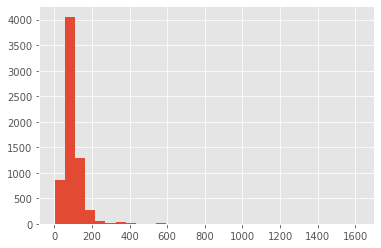

In [767]:
ax = plt.hist(x=df.runtime, bins=30)
plt.show()

In [768]:
df.runtime.max()

1620.0

In [769]:
df.runtime.sum()

661736.0

In [770]:
df.runtime.sort_values().nlargest(n=500).sum()

118400.0

In [771]:
df.groupby('title')['runtime'].mean().nlargest(n=10)

title
French Twist                                       1620.0
The Complete History of the Philadelphia Eagles    1620.0
Stranger Inside                                    1380.0
Thanksgiving Family Reunion                        1335.0
Sabretooth                                         1140.0
Alphaville                                          960.0
Tom and Jerry: The Magic Ring                       883.0
La Chèvre                                           780.0
15 Minutes                                          778.0
Alien Nation                                        720.0
Name: runtime, dtype: float64

In [772]:
#Number of movies per year

df.loc[df.kind == 'movie'].groupby('year')['title'].count().nlargest(n=30)

year
2001.0    325
2002.0    316
2003.0    308
2000.0    285
2004.0    265
1999.0    257
1998.0    202
1997.0    187
1996.0    167
1995.0    151
1994.0    132
1993.0    116
1988.0     95
1992.0     94
2005.0     87
1987.0     82
1991.0     81
1989.0     80
1990.0     73
1985.0     70
1972.0     68
1981.0     68
1986.0     68
1984.0     62
1973.0     60
1979.0     59
1974.0     58
1980.0     58
1976.0     55
1982.0     52
Name: title, dtype: int64

In [773]:
# Movies per country

df.loc[df.kind == 'movie'].groupby('country')['title'].count().nlargest(n=30)


country
['United States']                      1861
['United Kingdom']                      342
['Japan']                               284
['India']                               243
['Hong Kong']                           213
['France']                              146
['Canada']                              131
['United Kingdom', 'United States']      85
['Italy']                                65
['Australia']                            54
['United States', 'United Kingdom']      43
['Spain']                                40
['France', 'Italy']                      37
['Germany']                              36
['South Korea']                          35
['Italy', 'France']                      33
['Soviet Union']                         30
['West Germany']                         28
['United States', 'Canada']              25
['Mexico']                               24
['United States', 'Germany']             21
['Canada', 'United States']              20
['Germany', 'United Stat

In [774]:
runtime_drop = df.loc[df.runtime.isna()].index
df.drop(runtime_drop, axis=0, inplace=True)
df.info

<bound method DataFrame.info of                                                   title    year  \
0                                       Dinosaur Planet  2003.0   
1                                     Get Up and Dance!  1994.0   
3                          What the #$*! Do We (K)now!?  2004.0   
4     Class of Nuke 'Em High Part II: Subhumanoid Me...  1991.0   
6                      Neil Diamond: Greatest Hits Live  1988.0   
...                                                 ...     ...   
7261                                              Shade  2003.0   
7262                                Nothing But Trouble  1991.0   
7263                                 The Whistle Blower  1986.0   
7265                                     The Hitchhiker  1983.0   
7266                                          SpaceCamp  1986.0   

                kind                                              genre  \
0     tv mini series             ['Documentary', 'Animation', 'Family']   
1        vide

In [775]:
df.isna().sum()

title          0
year           0
kind           0
genre          0
rating       191
vote         191
country      198
language     281
cast           0
director    1019
writer       933
runtime        0
dtype: int64

In [776]:
df.director = df.director.replace(np.nan, 'Unknown')

In [777]:
df.director.unique()

array(['Unknown', "['Steve Purcell']",
       "['William Arntz', 'Betsy Chasse', 'Mark Vicente']", ...,
       "['Damian Nieman']", "['Dan Aykroyd']", "['Simon Langton']"],
      dtype=object)

In [778]:
df.writer = df.writer.replace(np.nan, 'Unknown')

In [779]:
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating      191
vote        191
country     198
language    281
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [780]:
rating_drop = df.loc[df.rating.isna()].index
df.drop(rating_drop, axis=0, inplace=True)
df.info

<bound method DataFrame.info of                                                   title    year  \
0                                       Dinosaur Planet  2003.0   
1                                     Get Up and Dance!  1994.0   
3                          What the #$*! Do We (K)now!?  2004.0   
4     Class of Nuke 'Em High Part II: Subhumanoid Me...  1991.0   
6                      Neil Diamond: Greatest Hits Live  1988.0   
...                                                 ...     ...   
7261                                              Shade  2003.0   
7262                                Nothing But Trouble  1991.0   
7263                                 The Whistle Blower  1986.0   
7265                                     The Hitchhiker  1983.0   
7266                                          SpaceCamp  1986.0   

                kind                                              genre  \
0     tv mini series             ['Documentary', 'Animation', 'Family']   
1        vide

In [781]:
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    223
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [782]:
df[df.vote.isna()]['runtime'].sort_values(ascending=False).sum()

0.0

In [783]:
missing_language = df.loc[(df.language.isna()==True) & (df.country == "['United States']")].index
missing_language

Int64Index([ 191,  208,  233,  414,  520,  554,  667,  730,  813,  819,  896,
             920,  928,  935,  947, 1044, 1110, 1226, 1401, 1529, 1649, 2141,
            2157, 2219, 2255, 2508, 2719, 2725, 2865, 2942, 3178, 3277, 3348,
            3393, 3508, 3513, 3535, 3826, 3888, 3948, 4148, 4195, 4245, 4291,
            4442, 4458, 4482, 4575, 4626, 4628, 4743, 4790, 4848, 4964, 5131,
            5146, 5167, 5257, 5278, 5283, 5524, 5863, 6908, 6945, 7054],
           dtype='int64')

In [784]:
df.language = np.where( (df.language.isna()) & (df.country == "['United States']"), 'English', df.language)
df.isna().sum()


title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    158
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [785]:
df.language = np.where( (df.language.isna()) & (df.country == "['Japan']"), 'Japanese', df.language)
df.isna().sum()


title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    147
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [786]:
df.language = np.where( (df.language.isna()) & (df.country == "['United Kingdom']"), 'English', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    143
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [787]:
df.country = np.where( (df.country.isna()) & (df.language == "['Japanese']"), 'Japan', df.country)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    143
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [788]:
df[(df.country.isna() == True) & (df.language.isna() == False)]['language'].value_counts()

['English']               13
['English', 'Spanish']     1
Name: language, dtype: int64

In [789]:
df[(df.language.isna() == True) & (df.country.isna() == False)]['country'].value_counts()

['Canada']                                       5
['Canada', 'United States']                      3
['Sweden']                                       2
['Canada', 'United Kingdom']                     2
['Norway']                                       1
['Canada', 'France', 'United Kingdom']           1
['France']                                       1
['Hong Kong']                                    1
['Italy']                                        1
['United States', 'Canada']                      1
['United States', 'Japan', 'Canada']             1
['United States', 'United Kingdom']              1
['Mexico']                                       1
['Canada', 'France', 'Guadeloupe']               1
['France', 'Madagascar', 'Vietnam', 'Canada']    1
['Ireland', 'United States']                     1
Name: country, dtype: int64

In [790]:
df.language = np.where( (df.language.isna()) & (df.country == "['Sweden']"), 'Swedish', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    141
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [791]:
df.language = np.where( (df.language.isna()) & (df.country == "['Norway']"), 'Norwegian', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language    140
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6290 non-null   object 
 7   language  6283 non-null   object 
 8   cast      6423 non-null   object 
 9   director  6423 non-null   object 
 10  writer    6423 non-null   object 
 11  runtime   6423 non-null   float64
dtypes: float64(4), object(8)
memory usage: 652.3+ KB


In [793]:
df.language = np.where((df.language.isna()), 'Other', df.language)
df.isna().sum()

title         0
year          0
kind          0
genre         0
rating        0
vote          0
country     133
language      0
cast          0
director      0
writer        0
runtime       0
dtype: int64

In [794]:
df.country = np.where((df.country.isna()), 'Other', df.country)
df.isna().sum()

title       0
year        0
kind        0
genre       0
rating      0
vote        0
country     0
language    0
cast        0
director    0
writer      0
runtime     0
dtype: int64

In [795]:
df.drop('cast', axis=1, inplace=True)

In [796]:
df.head()

,title,year,kind,genre,rating,vote,country,language,director,writer,runtime
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],Unknown,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['Steve Purcell'],Unknown,83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['William Arntz', 'Betsy Chasse', 'Mark Vicente']","['William Arntz', 'Betsy Chasse', 'Matthew Hoffman']",60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Meltdown,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],['Eric Louzil'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,"['Documentary', 'Music']",8.0,81.0,['United States'],['English'],"['Dwight Hemion', 'Peter Israelson']","['Kenny Solms', 'Ann Elder', 'Toem Perew']",55.0


In [797]:
df.drop('writer', axis=1, inplace=True)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     6423 non-null   object 
 1   year      6423 non-null   float64
 2   kind      6423 non-null   object 
 3   genre     6423 non-null   object 
 4   rating    6423 non-null   float64
 5   vote      6423 non-null   float64
 6   country   6423 non-null   object 
 7   language  6423 non-null   object 
 8   director  6423 non-null   object 
 9   runtime   6423 non-null   float64
dtypes: float64(4), object(6)
memory usage: 552.0+ KB


In [799]:
df.language.value_counts()

['English']                                                                     3795
['Japanese']                                                                     342
['Hindi']                                                                        164
Other                                                                            140
['French']                                                                       136
                                                                                ... 
['English', 'Hungarian']                                                           1
['Italian', 'English', 'Latin', 'Greek, Ancient (to 1453)']                        1
['English', 'German', 'French', 'Polish']                                          1
['Portuguese', 'Spanish']                                                          1
['Cantonese', 'English', 'Japanese', 'Hindi', 'Mandarin', 'Punjabi', 'Urdu']       1
Name: language, Length: 583, dtype: int64

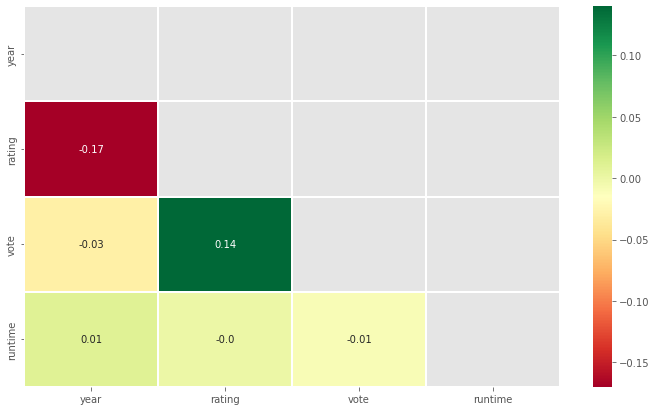

In [800]:
fig, ax = plt.subplots(figsize= (12,7))

corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt="", cmap='RdYlGn', mask=mask, linewidths=0.30, ax=ax)
plt.show()

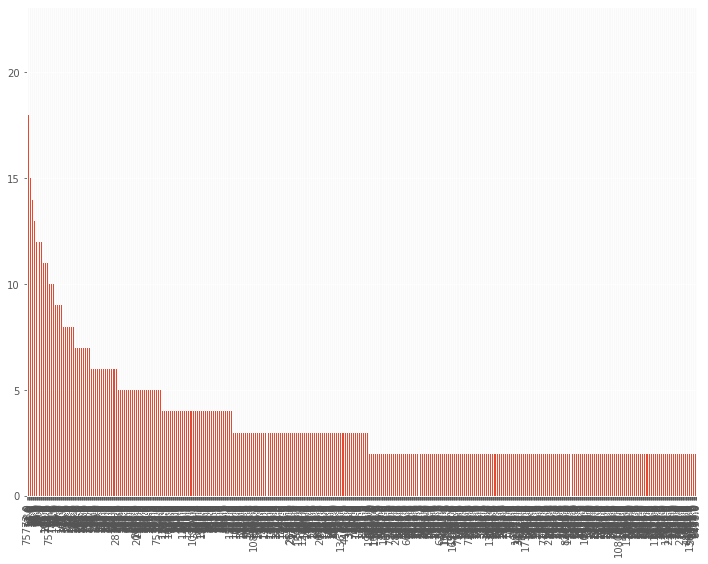

In [801]:
vote = df.vote.value_counts().nlargest(n=1000)
fig, ax = plt.subplots(figsize=(12, 9))
plt.style.use('ggplot')
vote.plot.bar()
plt.show()

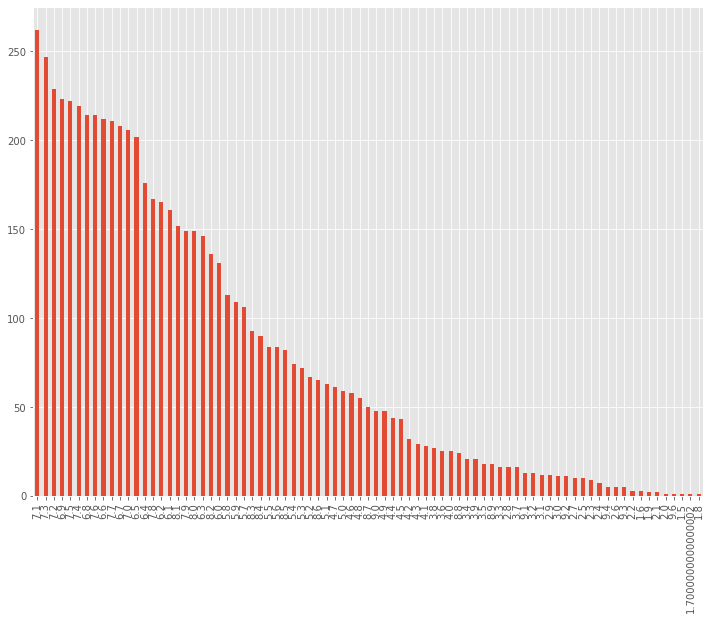

In [802]:
rating = df.rating.value_counts().nlargest(n=1000)
fig, ax = plt.subplots(figsize=(12, 9))
plt.style.use('ggplot')
rating.plot.bar()
plt.show()

In [803]:
#Split genres, country, language and keep first of each

df.country = df.country.str.replace("[", "").str.replace("]", "")
df.country
netflix_country= df.country.str.split(",").apply(pd.Series)
df.country=netflix_country[0]
df.country


df.genre=df.genre.str.replace("[", "").str.replace("]", "")
df.genre
netflix_genre= df.genre.str.split(",").apply(pd.Series)
df.genre=netflix_genre[0]
df.genre 

df.language=df.language.str.replace("[", "").str.replace("]", "")
df.language
netflix_language= df.language.str.split(",").apply(pd.Series)
df.language=netflix_language[0]
df.language

df.director=df.director.str.replace("[", "").str.replace("]", "")
df.director
netflix_director= df.director.str.split(",").apply(pd.Series)
df.director = netflix_director[0]
df.director



C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\4069824184.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.country = df.country.str.replace("[", "").str.replace("]", "")
C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\4069824184.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.genre=df.genre.str.replace("[", "").str.replace("]", "")
C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\4069824184.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.language=df.language.str.replace("[", "").str.replace("]

0               Unknown
1       'Steve Purcell'
3       'William Arntz'
4         'Eric Louzil'
6       'Dwight Hemion'
             ...       
7261    'Damian Nieman'
7262      'Dan Aykroyd'
7263    'Simon Langton'
7265            Unknown
7266      'Harry Winer'
Name: director, Length: 6423, dtype: object

In [804]:
df.head()

,title,year,kind,genre,rating,vote,country,language,director,runtime
0,Dinosaur Planet,2003.0,tv mini series,'Documentary',7.7,474.0,'United States','English',Unknown,50.0
1,Get Up and Dance!,1994.0,video movie,'Family',8.1,18.0,'United States','English','Steve Purcell',83.0
3,What the #$*! Do We (K)now!?,2004.0,movie,'Documentary',5.3,13432.0,'United States','English','William Arntz',60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Meltdown,1991.0,movie,'Comedy',4.5,2177.0,'United States','English','Eric Louzil',96.0
6,Neil Diamond: Greatest Hits Live,1988.0,video movie,'Documentary',8.0,81.0,'United States','English','Dwight Hemion',55.0


In [805]:
#The most popular genre per year

df.groupby(["year","genre"])['vote'].sum().nlargest(n=20).sort_values(ascending=False)


year    genre      
2003.0  'Action'       5916943.0
1972.0  'Crime'        3424838.0
1999.0  'Action'       3167899.0
1959.0  'Drama'        3040837.0
1994.0  'Drama'        2939375.0
        'Action'       2679298.0
1998.0  'Comedy'       2562623.0
2002.0  'Action'       2454964.0
1994.0  'Crime'        1980119.0
2004.0  'Action'       1632839.0
        'Comedy'       1620581.0
2001.0  'Animation'    1598038.0
1993.0  'Action'       1552182.0
2001.0  'Comedy'       1513836.0
1997.0  'Action'       1407697.0
2002.0  'Crime'        1308598.0
2003.0  'Comedy'       1264080.0
1980.0  'Action'       1245586.0
1983.0  'Action'       1207704.0
1991.0  'Action'       1196659.0
Name: vote, dtype: float64

In [806]:
#The most popular genre per country

df.groupby(["country", "genre"])['vote'].sum().nlargest(n=30).sort_values(ascending=False)


country           genre        
'United States'   'Action'         22264275.0
                  'Comedy'         12620452.0
                  'Drama'           9698193.0
                  'Crime'           8281067.0
                  'Animation'       4224040.0
'Japan'           'Animation'       3787472.0
'United Kingdom'  'Comedy'          3160027.0
'France'          'Action'          2910337.0
'United Kingdom'  'Drama'           2490949.0
'United States'   'Horror'          2329175.0
                  'Biography'       2315558.0
'United Kingdom'  'Adventure'       2167617.0
'New Zealand'     'Action'          1709032.0
'United States'   'Adventure'       1650921.0
'France'          'Comedy'          1374472.0
'United States'   'Documentary'     1263992.0
'United Kingdom'  'Action'          1156429.0
'Hong Kong'       'Action'          1112277.0
'United Kingdom'  'Biography'       1039053.0
'Japan'           'Action'          1019767.0
'United States'   'Mystery'          994961.0
'F

In [807]:
df.kind.value_counts()


movie             3793
video movie        960
tv movie           616
tv series          509
episode            325
tv mini series     204
video game           8
tv short             8
Name: kind, dtype: int64

In [808]:
df.genre.value_counts()

'Drama'          1190
'Comedy'         1089
'Documentary'    1008
'Action'          878
'Animation'       661
'Crime'           369
'Adventure'       259
'Horror'          249
'Biography'       190
'Music'           171
'Family'           61
'Short'            60
'Fantasy'          40
'Thriller'         37
'Mystery'          26
'Sci-Fi'           25
'Musical'          23
'Romance'          21
'Western'          19
'Sport'            19
'Reality-TV'       12
'History'           7
'Game-Show'         5
'Film-Noir'         3
'Talk-Show'         1
Name: genre, dtype: int64

In [809]:
other_genres = df.genre.value_counts()[10:].index.tolist()

In [810]:
df.genre[df.genre.isin(other_genres)]="Other"
df.genre.unique()

C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\2262671922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.genre[df.genre.isin(other_genres)]="Other"


array(["'Documentary'", 'Other', "'Comedy'", "'Action'", "'Adventure'",
       "'Drama'", "'Animation'", "'Horror'", "'Biography'", "'Music'",
       "'Crime'"], dtype=object)

In [811]:
df.genre.value_counts()

#genre is now ok for dummies

'Drama'          1190
'Comedy'         1089
'Documentary'    1008
'Action'          878
'Animation'       661
'Crime'           369
Other             359
'Adventure'       259
'Horror'          249
'Biography'       190
'Music'           171
Name: genre, dtype: int64

In [812]:
df.country.value_counts()

'United States'     3073
'United Kingdom'     835
'Japan'              513
'Canada'             312
'France'             280
                    ... 
'Portugal'             1
'Aruba'                1
'East Germany'         1
'Cambodia'             1
'Venezuela'            1
Name: country, Length: 63, dtype: int64

In [813]:
other_countries = df.country.value_counts()[10:].index.tolist()

In [814]:
df.country[df.country.isin(other_countries)]="Other"
df.country.unique()

C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\4140505687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[df.country.isin(other_countries)]="Other"


array(["'United States'", "'United Kingdom'", "'India'", "'Japan'",
       "'France'", "'Canada'", 'Other', "'Hong Kong'", "'Italy'",
       "'Australia'"], dtype=object)

In [815]:
df.country.value_counts()

'United States'     3073
'United Kingdom'     835
Other                768
'Japan'              513
'Canada'             312
'France'             280
'Hong Kong'          224
'India'              209
'Italy'              121
'Australia'           88
Name: country, dtype: int64

In [816]:
df_num = df.select_dtypes(include=np.number)
df_num

,year,rating,vote,runtime
0,2003.0,7.7,474.0,50.0
1,1994.0,8.1,18.0,83.0
3,2004.0,5.3,13432.0,60.0
4,1991.0,4.5,2177.0,96.0
6,1988.0,8.0,81.0,55.0
...,...,...,...,...
7261,2003.0,6.3,12485.0,106.0
7262,1991.0,5.1,23598.0,92.0
7263,1986.0,6.2,2069.0,123.0
7265,1983.0,6.8,1482.0,112.0


In [817]:
df_cat= df.drop(df_num, axis=1)
df_cat

,title,kind,genre,country,language,director
0,Dinosaur Planet,tv mini series,'Documentary','United States','English',Unknown
1,Get Up and Dance!,video movie,Other,'United States','English','Steve Purcell'
3,What the #$*! Do We (K)now!?,movie,'Documentary','United States','English','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Meltdown,movie,'Comedy','United States','English','Eric Louzil'
6,Neil Diamond: Greatest Hits Live,video movie,'Documentary','United States','English','Dwight Hemion'
...,...,...,...,...,...,...
7261,Shade,movie,'Crime','United States','English','Damian Nieman'
7262,Nothing But Trouble,movie,'Comedy','United States','English','Dan Aykroyd'
7263,The Whistle Blower,movie,Other,'United Kingdom','English','Simon Langton'
7265,The Hitchhiker,tv series,'Drama','Canada','English',Unknown


In [818]:
other_languages = df.language.value_counts()[10:].index.tolist()

df.language[df.language.isin(other_languages)]="Other"
df.language.unique()

C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\3684344997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.language[df.language.isin(other_languages)]="Other"


array(["'English'", "'Hindi'", "'Japanese'", "'French'", 'Other',
       "'Cantonese'", "'Mandarin'", "'Spanish'", "'German'", "'Italian'"],
      dtype=object)

In [819]:
df.language.value_counts()

'English'      4493
Other           520
'Japanese'      438
'French'        248
'Hindi'         193
'Cantonese'     183
'Italian'       102
'Spanish'        99
'German'         76
'Mandarin'       71
Name: language, dtype: int64

In [820]:
df.drop('language', axis=1, inplace=True)

In [821]:
other_directors = df.director.value_counts()[10:].index.tolist()

df.director[df.director.isin(other_directors)]="Other"
df.director.value_counts()

C:\Users\olivi\AppData\Local\Temp\ipykernel_21044\2820433243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.director[df.director.isin(other_directors)]="Other"


Other                     5369
Unknown                    926
'Kevin Dunn'                21
'Beth McCarthy-Miller'      14
'Akira Kurosawa'            14
'Takashi Miike'             14
'Werner Herzog'             14
'Jing Wong'                 13
'David Mallet'              13
'Tom Clegg'                 13
'Jim Wynorski'              12
Name: director, dtype: int64

In [822]:
df.drop('director', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    6423 non-null   object 
 1   year     6423 non-null   float64
 2   kind     6423 non-null   object 
 3   genre    6423 non-null   object 
 4   rating   6423 non-null   float64
 5   vote     6423 non-null   float64
 6   country  6423 non-null   object 
 7   runtime  6423 non-null   float64
dtypes: float64(4), object(4)
memory usage: 451.6+ KB


In [823]:
#Label encoder

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df.kind = label.fit_transform(df.kind)


In [824]:
df.head()

,title,year,kind,genre,rating,vote,country,runtime
0,Dinosaur Planet,2003.0,2,'Documentary',7.7,474.0,'United States',50.0
1,Get Up and Dance!,1994.0,7,Other,8.1,18.0,'United States',83.0
3,What the #$*! Do We (K)now!?,2004.0,1,'Documentary',5.3,13432.0,'United States',60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Meltdown,1991.0,1,'Comedy',4.5,2177.0,'United States',96.0
6,Neil Diamond: Greatest Hits Live,1988.0,7,'Documentary',8.0,81.0,'United States',55.0


In [825]:
df.groupby('title')['vote'].mean().sort_values(ascending=False)

title
The Shawshank Redemption                         2461873.0
Pulp Fiction                                     1907147.0
The Matrix                                       1755454.0
The Lord of the Rings: The Return of the King    1708569.0
The Godfather                                    1702753.5
                                                   ...    
Spooks and Creeps                                      6.0
VeggieTales: The Toy That Saved Christmas!             6.0
The Little Fugitive                                    6.0
Pride 10: Return of the Warriors                       6.0
Underground Railroad                                   5.0
Name: vote, Length: 6187, dtype: float64

In [826]:
df.drop('title', axis=1, inplace=True)
df.head()

,year,kind,genre,rating,vote,country,runtime
0,2003.0,2,'Documentary',7.7,474.0,'United States',50.0
1,1994.0,7,Other,8.1,18.0,'United States',83.0
3,2004.0,1,'Documentary',5.3,13432.0,'United States',60.0
4,1991.0,1,'Comedy',4.5,2177.0,'United States',96.0
6,1988.0,7,'Documentary',8.0,81.0,'United States',55.0


In [827]:
df.genre = label.fit_transform(df.genre)
df.head()

,year,kind,genre,rating,vote,country,runtime
0,2003.0,2,6,7.7,474.0,'United States',50.0
1,1994.0,7,10,8.1,18.0,'United States',83.0
3,2004.0,1,6,5.3,13432.0,'United States',60.0
4,1991.0,1,4,4.5,2177.0,'United States',96.0
6,1988.0,7,6,8.0,81.0,'United States',55.0


In [828]:
df.country = label.fit_transform(df.country)
df.head()

,year,kind,genre,rating,vote,country,runtime
0,2003.0,2,6,7.7,474.0,8,50.0
1,1994.0,7,10,8.1,18.0,8,83.0
3,2004.0,1,6,5.3,13432.0,8,60.0
4,1991.0,1,4,4.5,2177.0,8,96.0
6,1988.0,7,6,8.0,81.0,8,55.0


In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6423 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     6423 non-null   float64
 1   kind     6423 non-null   int32  
 2   genre    6423 non-null   int32  
 3   rating   6423 non-null   float64
 4   vote     6423 non-null   float64
 5   country  6423 non-null   int32  
 6   runtime  6423 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 326.2 KB


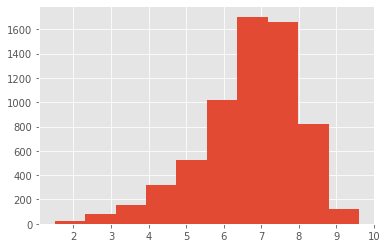

In [830]:
df.rating.hist()
plt.show()

In [831]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    
    # Your code here:

    mean = np.mean(x, axis=0) 
    std = np.std(x, axis=0)
    
    return (x-mean)/std

standardize(np.array([[1,2,3],[4,5,6]]))   

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [832]:
#Bin our runtime (Y = vote)

df.vote = pd.qcut(df.vote,
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df.head()


,year,kind,genre,rating,vote,country,runtime
0,2003.0,2,6,7.7,1,8,50.0
1,1994.0,7,10,8.1,0,8,83.0
3,2004.0,1,6,5.3,4,8,60.0
4,1991.0,1,4,4.5,2,8,96.0
6,1988.0,7,6,8.0,0,8,55.0


In [833]:
#Split train and test sets + normalize x !

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

# Your code here:
x = df.drop(['vote'], axis=1)
y = df['vote']
# print(x.head())
print(x.shape)
# print(y.head())
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6423, 6)
(6423,)
(5780, 6)
(5780,)
(643, 6)
(643,)


In [834]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [835]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

The accuracy of the Random Forest Classifier is: 51.01088646967341 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       135
           1       0.49      0.41      0.45       129
           2       0.41      0.37      0.39       123
           3       0.44      0.48      0.46       133
           4       0.61      0.67      0.64       123

    accuracy                           0.51       643
   macro avg       0.51      0.51      0.51       643
weighted avg       0.51      0.51      0.51       643



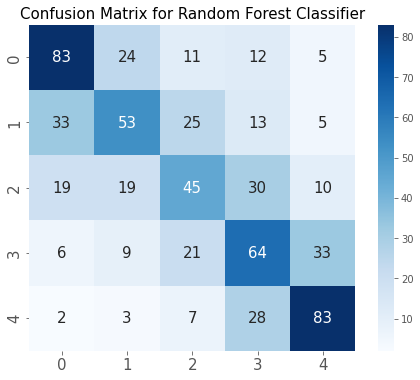

In [836]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=15, random_state=25)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')


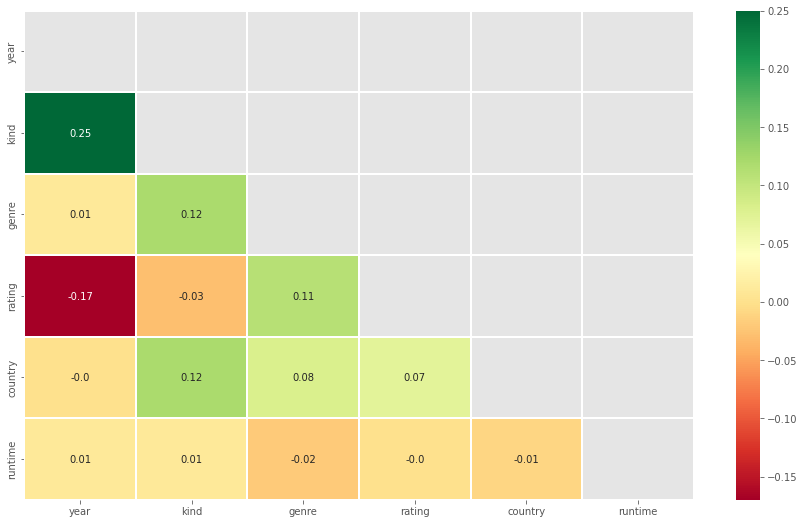

In [568]:
fig, ax = plt.subplots(figsize= (15,9))

dfX = df.drop('vote', axis=1)

corr = dfX.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt="", cmap='RdYlGn', mask=mask, linewidths=0.30, ax=ax)
plt.show()

In [561]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto', max_iter=2000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)

The accuracy of the Logistic Regression is: 32.8149300155521 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       135
           1       0.31      0.18      0.23       129
           2       0.29      0.25      0.27       123
           3       0.34      0.16      0.22       133
           4       0.31      0.63      0.41       123

    accuracy                           0.33       643
   macro avg       0.33      0.33      0.31       643
weighted avg       0.33      0.33      0.31       643



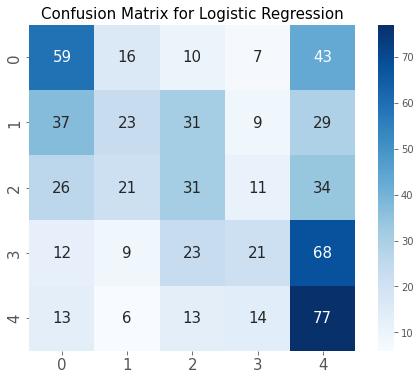

In [562]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [563]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

------------- 3 -------------------
[[62 33 16  9 15]
 [44 34 23 10 18]
 [41 30 29 12 11]
 [27 35 27 30 14]
 [22 36 21 21 23]]
------------- 4 -------------------
[[59 22 23 14 17]
 [43 29 23 16 18]
 [29 29 31 21 13]
 [20 23 23 45 22]
 [16 29 20 31 27]]
------------- 5 -------------------
[[54 27 26 15 13]
 [36 26 33 21 13]
 [27 21 32 28 15]
 [20 27 32 35 19]
 [13 25 26 27 32]]
------------- 6 -------------------
[[60 22 24 12 17]
 [42 24 29 19 15]
 [28 27 28 25 15]
 [19 27 30 33 24]
 [13 31 21 30 28]]
------------- 7 -------------------
[[58 23 27 16 11]
 [42 29 24 21 13]
 [27 28 24 25 19]
 [18 23 28 40 24]
 [16 25 25 25 32]]
------------- 8 -------------------
[[60 21 24 15 15]
 [40 30 20 21 18]
 [27 24 27 25 20]
 [19 24 29 38 23]
 [20 22 20 29 32]]
------------- 9 -------------------
[[57 21 23 19 15]
 [39 28 22 19 21]
 [26 24 26 24 23]
 [19 19 33 36 26]
 [17 21 24 29 32]]
------------- 10 -------------------
[[62 18 24 16 15]
 [39 30 20 20 20]
 [31 25 21 19 27]
 [16 23 30 32 32]
 [

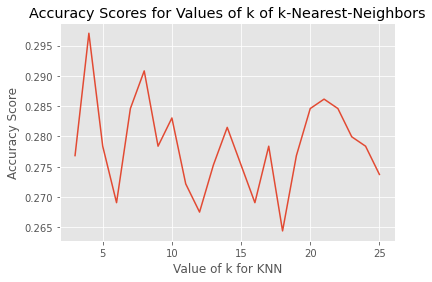

In [564]:
#KNN with number of neighbors k
# Based on X_test i want to predict y
k_range = list(range(3,26))
# range, check 26 variance ranging from 1 to 26 to check accuracy
# neighbors are subgroups of our sample, we test different nber of neighbors to see the more accurate model
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit on train data to predict new data, test data
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()



In [565]:
#Linear Discriminant Analysis Olivier

# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define dataset
x, y = x_train, y_train

# define model
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.354 (0.016)


In [ ]:
#BaggingCLassifier  Ting

import numpy as np
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import BaggingClassifier

## declare a bagging classifier instance ##
ens = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),n_estimators=500)
## use k fold cross validation to measure performance ##
scoring_metrics = ['accuracy','precision','recall']
dcScores = cross_validate(ens,x_train,y_train,cv=StratifiedKFold(10),scoring=scoring_metrics, error_score='raise')
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))

In [ ]:
#Extra Tree

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

etc = ExtraTreesClassifier(random_state=0)
cv_score = cross_val_score(etc, x_train, y_train, cv=5).mean()
print("The average Cross validation score is ", cv_score)





The average Cross validation score is  0.4676470588235294


In [ ]:
#RFE

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn import linear_model

import statsmodels.api as sm

lin_model = linear_model.LinearRegression()
lin_model.fit(x_train, y_train)
selector_rfe = RFE(estimator = lin_model, n_features_to_select = 3, step = 1)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier


selector_rfe.fit(x_train, y_train)
selector_rfe.ranking_

array([2, 1, 1, 1, 3, 4])

In [ ]:
#Gradient Tree Boosting     Ting




In [ ]:
#GaussianProcessClassifier Olivier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

model = GaussianProcessClassifier()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

x, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()


In [ ]:
#robust

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
x_train = rc.fit_transform(x_train)
x_test = rc.transform(x_test)